**Setup**

In [ ]:
import time
import birdnet
import soundfile as sf
import sounddevice as sd
import numpy as np
import cProfile

m=birdnet.load('geo','2.4','tf')
print('loaded', type(m))

In [ ]:
#Consts
SAMPLE_RATE = 44100
CHANNELS = 1
sd.default.samplerate = SAMPLE_RATE
sd.default.channels = 2

In [ ]:
# Predict directory
predictions = m.predict("data/")
print(predictions)

In [ ]:
# Predict directory
predictions = m.predict(-33.6903, 150.5296)
predictions.to_csv('out/predictionsLong.csv')
print(predictions)

In [ ]:
# Record
duration = 5  # seconds
myrecording = sd.rec(int(duration * SAMPLE_RATE))
sd.wait()
# Write out to wav
pr = cProfile.Profile()
pr.enable()
sf.write("out/attempt.wav", myrecording, SAMPLE_RATE)
pr.disable()
pr.print_stats(sort="cumulative")

In [ ]:
# Streaming and playback
def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata  # pass-through (monitoring)

with sd.Stream(
        dtype='float32',
        callback=callback,
):
    sd.sleep(5000)

Record to predict pipeline

In [ ]:
# Record
duration = 10  # seconds
myrecording = sd.rec(int(duration * SAMPLE_RATE))
sd.wait()
# Write out to wav
# pr = cProfile.Profile()
# pr.enable()
sf.write("out/attempt.wav", myrecording, SAMPLE_RATE)
# pr.disable()
# pr.print_stats(sort="cumulative")
predictions = m.predict("out/attempt.wav")
predictions.to_csv("out/predictions.csv")


In [ ]:
# bird_analyzer.py
import subprocess
import sounddevice as sd
from scipy.io.wavfile import write
import pandas as pd
from pathlib import Path

SAMPLE_RATE = 48000
DURATION = 30
AUDIO = "recording.wav"
CSV = "results.csv"
BIRDNET = Path("BirdNET-Analyzer")

print("Recording...")
audio = sd.rec(int(DURATION * SAMPLE_RATE),
               samplerate=SAMPLE_RATE,
               channels=1,
               dtype="int16")
sd.wait()
write(AUDIO, SAMPLE_RATE, audio)

print("Analyzing...")
subprocess.run([
    "python3",
    str(BIRDNET / "analyze.py"),
    "--i", AUDIO,
    "--o", CSV,
    "--min_conf", "0.25",
    "--rtype", "csv",
], check=True)

df = pd.read_csv(CSV)
df = df.sort_values("Confidence", ascending=False)

print("\nTop detections:")
print(df[["Start (s)", "Common name", "Confidence"]].head(10))


In [ ]:
import cv2 as cv
import numpy as np

print("OpenCV:", cv.__version__)
img = np.zeros((120, 400, 3), dtype=np.uint8)
cv.putText(img, "OpenCV OK", (10, 80), cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
# If you installed a non-headless build, you can display a window:
cv.imshow("hello", img); cv.waitKey(0)
# Always safe (headless or not): save to file
cv.imwrite("data/images/hello.png", img)

In [ ]:

import cv2 as cv
import sys

img = cv.imread("data/images/hello.png")

if img is None:
    sys.exit("Could not read the image.")
print(type(img))

cv.imshow("Display window", img)
k = cv.waitKey(0)

if k == ord("s"):
    cv.imwrite("data/images/starry_night.png", img)

# **Following a motion detection tutorial**
https://www.youtube.com/watch?v=T-7OSD5a-88

In [2]:
#Imports

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time

In [3]:
# Loading and preprocessing
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=500)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image)
    plt.axis("off")
    return image, gray_image

(array([[[ 51,  55,  40],
         [ 44,  49,  32],
         [ 46,  50,  33],
         ...,
         [154, 152, 141],
         [169, 167, 158],
         [177, 176, 168]],
 
        [[ 67,  70,  57],
         [ 55,  59,  42],
         [ 47,  49,  36],
         ...,
         [161, 158, 148],
         [159, 155, 145],
         [164, 162, 151]],
 
        [[ 78,  82,  71],
         [ 62,  64,  53],
         [ 49,  51,  37],
         ...,
         [161, 158, 146],
         [157, 153, 141],
         [169, 164, 151]],
 
        ...,
 
        [[ 46,  50,  37],
         [ 46,  50,  36],
         [ 42,  49,  30],
         ...,
         [ 11,  11,   9],
         [ 15,  16,  14],
         [ 15,  15,  15]],
 
        [[ 42,  51,  31],
         [ 43,  50,  36],
         [ 42,  47,  34],
         ...,
         [  8,   9,   7],
         [ 12,  15,  13],
         [ 14,  17,  15]],
 
        [[ 39,  46,  34],
         [ 41,  46,  36],
         [ 44,  49,  39],
         ...,
         [  7,   8,   6],
  

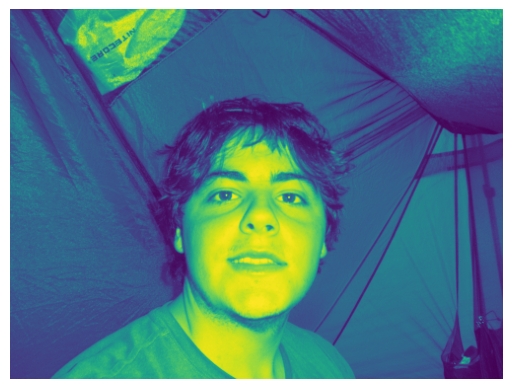

In [4]:
load_and_preprocess("data/images/P1010072.JPG")